# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
import json
from citipy import citipy
# Import API key
import api_keys


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

In [24]:
cities_df = pd.DataFrame({"city": cities })

cities_df = cities_df.drop_duplicates('city')

cities_df["country"] = ""
cities_df["cloudiness"] = ""
cities_df["date"] = ""
cities_df["humidity"] = ""
cities_df["lat"] = ""
cities_df["lon"] = ""
cities_df["temp_max"] = "" 
cities_df["wind_speed"] = ""

cities_df.head()



city country cloudiness date humidity lat lon temp_max wind_speed
0        morti                                                             
1  provideniya                                                             
2      rikitea                                                             
3       sabang                                                             
4   chokurdakh

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
api_key = "b12c496902bc510d29a8f3b9027c456a"

row_count = 0

print("**********************")
print("BEGINNING DATA RETRIEVAL")
print("**********************")

**********************
BEGINNING DATA RETRIEVAL
**********************


In [26]:
for index, row in cities_df.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row['city'], api_key)
    response = requests.get(target_url).json()
    print("------------------------")
    print("Retrieving city #%s: %s" % (row_count + 1, cities_df.loc[index]['city']))
    print(target_url)
    row_count += 1
    
    try:
        cities_df.set_value(index, "lat", response["coord"]["lat"])
        cities_df.set_value(index, "lon", response["coord"]["lon"])
        cities_df.set_value(index, "date", response["dt"])
        cities_df.set_value(index, "humidity", response["main"]["humidity"])
        cities_df.set_value(index, "wind_speed", response["wind"]["speed"])
        cities_df.set_value(index, "temp_max", response["main"]["temp_max"])
        cities_df.set_value(index, "cloudiness", response["clouds"]["all"])
        cities_df.set_value(index, "country", response["sys"]['country'])
        
    except:
        
        print("Missing details... skip.")
                
        if row_count % 50 == 0:
          print("********************")
          print("PAUSE FOR 30 SECONDS")
          print("********************")
          time.sleep (30)
                 
print("**********************")
print("DATA RETRIEVAL COMPLETE")
print("**********************")
          
          

------------------------
Retrieving city #1: morti
http://api.openweathermap.org/data/2.5/weather?q=morti&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Missing details... skip.
------------------------
Retrieving city #2: provideniya
http://api.openweathermap.org/data/2.5/weather?q=provideniya&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #3: rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: F

------------------------
Retrieving city #4: sabang
http://api.openweathermap.org/data/2.5/weather?q=sabang&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #5: chokurdakh
http://api.openweathermap.org/data/2.5/weather?q=chokurdakh&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #6: alotau
http://api.openweathermap.org/data/2.5/weather?q=alotau&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Missing details... skip.
------------------------
Retrieving city #7: acapulco
http://api.openweathermap.org/data/2.5/weather?q=acapulco&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #8: grants
http://api.openweathermap.org/data/2.5/weather?q=grants&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #9: ramsar
http://api.openweathermap.org/data/2.5/weather?q=ramsar&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9

------------------------
Retrieving city #55: hami
http://api.openweathermap.org/data/2.5/weather?q=hami&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #56: saskylakh
http://api.openweathermap.org/data/2.5/weather?q=saskylakh&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #57: punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta arenas&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #58: thompson
http://api.openweathermap.org/data/2.5/weather?q=thompson&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #59: mersin
http://api.openweathermap.org/data/2.5/weather?q=mersin&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #60: khonuu
http://api.openweathermap.org/data/2.5/weather?q=khonuu&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Miss

------------------------
Retrieving city #104: mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #105: suntar
http://api.openweathermap.org/data/2.5/weather?q=suntar&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #106: port alfred
http://api.openweathermap.org/data/2.5/weather?q=port alfred&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #107: aragarcas
http://api.openweathermap.org/data/2.5/weather?q=aragarcas&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #108: nome
http://api.openweathermap.org/data/2.5/weather?q=nome&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #109: nhulunbuy
http://api.openweathermap.org/data/2.5/weather?q=nhulunbuy&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c4

------------------------
Retrieving city #152: huai thalaeng
http://api.openweathermap.org/data/2.5/weather?q=huai thalaeng&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #153: clyde river
http://api.openweathermap.org/data/2.5/weather?q=clyde river&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #154: fairbanks
http://api.openweathermap.org/data/2.5/weather?q=fairbanks&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #155: caravelas
http://api.openweathermap.org/data/2.5/weather?q=caravelas&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #156: rantepao
http://api.openweathermap.org/data/2.5/weather?q=rantepao&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #157: coihueco
http://api.openweathermap.org/data/2.5/weather?q=coihueco&units=IMPERIAL&appid=b12c4

------------------------
Retrieving city #200: sembe
http://api.openweathermap.org/data/2.5/weather?q=sembe&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Missing details... skip.
********************
PAUSE FOR 30 SECONDS
********************
------------------------
Retrieving city #201: coquimbo
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #202: honiara
http://api.openweathermap.org/data/2.5/weather?q=honiara&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #203: vaitupu
http://api.openweathermap.org/data/2.5/weather?q=vaitupu&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Missing details... skip.
------------------------
Retrieving city #204: bolshoye murashkino
http://api.openweathermap.org/data/2.5/weather?q=bolshoye murashkino&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving

------------------------
Retrieving city #248: alakurtti
http://api.openweathermap.org/data/2.5/weather?q=alakurtti&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #249: gamba
http://api.openweathermap.org/data/2.5/weather?q=gamba&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #250: lolua
http://api.openweathermap.org/data/2.5/weather?q=lolua&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Missing details... skip.
********************
PAUSE FOR 30 SECONDS
********************
------------------------
Retrieving city #251: centralina
http://api.openweathermap.org/data/2.5/weather?q=centralina&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #252: goundam
http://api.openweathermap.org/data/2.5/weather?q=goundam&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #253: obala
http://api.openweathermap.o

------------------------
Retrieving city #297: la ronge
http://api.openweathermap.org/data/2.5/weather?q=la ronge&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #298: marsa matruh
http://api.openweathermap.org/data/2.5/weather?q=marsa matruh&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #299: saint-georges
http://api.openweathermap.org/data/2.5/weather?q=saint-georges&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #300: pulaski
http://api.openweathermap.org/data/2.5/weather?q=pulaski&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #301: grand centre
http://api.openweathermap.org/data/2.5/weather?q=grand centre&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Missing details... skip.
------------------------
Retrieving city #302: larap
http://api.openweathermap.org/data/2.5/weather?q=larap&uni

------------------------
Retrieving city #345: ketchikan
http://api.openweathermap.org/data/2.5/weather?q=ketchikan&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #346: malino
http://api.openweathermap.org/data/2.5/weather?q=malino&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #347: les cayes
http://api.openweathermap.org/data/2.5/weather?q=les cayes&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #348: winnemucca
http://api.openweathermap.org/data/2.5/weather?q=winnemucca&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #349: rungata
http://api.openweathermap.org/data/2.5/weather?q=rungata&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Missing details... skip.
------------------------
Retrieving city #350: den helder
http://api.openweathermap.org/data/2.5/weather?q=den helder&units=IMPERIAL&

------------------------
Retrieving city #394: sorvag
http://api.openweathermap.org/data/2.5/weather?q=sorvag&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Missing details... skip.
------------------------
Retrieving city #395: souillac
http://api.openweathermap.org/data/2.5/weather?q=souillac&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #396: lorengau
http://api.openweathermap.org/data/2.5/weather?q=lorengau&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #397: baculin
http://api.openweathermap.org/data/2.5/weather?q=baculin&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #398: codrington
http://api.openweathermap.org/data/2.5/weather?q=codrington&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #399: borgarnes
http://api.openweathermap.org/data/2.5/weather?q=borgarnes&units=IMPERIAL&appid=

------------------------
Retrieving city #444: bolshiye uki
http://api.openweathermap.org/data/2.5/weather?q=bolshiye uki&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Missing details... skip.
------------------------
Retrieving city #445: viransehir
http://api.openweathermap.org/data/2.5/weather?q=viransehir&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #446: yulara
http://api.openweathermap.org/data/2.5/weather?q=yulara&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #447: port pirie
http://api.openweathermap.org/data/2.5/weather?q=port pirie&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #448: coihaique
http://api.openweathermap.org/data/2.5/weather?q=coihaique&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #449: tatawin
http://api.openweathermap.org/data/2.5/weather?q=tatawin&units=IMP

------------------------
Retrieving city #494: booue
http://api.openweathermap.org/data/2.5/weather?q=booue&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #495: esperance
http://api.openweathermap.org/data/2.5/weather?q=esperance&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #496: avera
http://api.openweathermap.org/data/2.5/weather?q=avera&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #497: kaeo
http://api.openweathermap.org/data/2.5/weather?q=kaeo&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #498: riyadh
http://api.openweathermap.org/data/2.5/weather?q=riyadh&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #499: kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?q=kangaatsiaq&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
--------

------------------------
Retrieving city #544: doctor pedro p. pena
http://api.openweathermap.org/data/2.5/weather?q=doctor pedro p. pena&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Missing details... skip.
------------------------
Retrieving city #545: dunedin
http://api.openweathermap.org/data/2.5/weather?q=dunedin&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #546: busayra
http://api.openweathermap.org/data/2.5/weather?q=busayra&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #547: port lincoln
http://api.openweathermap.org/data/2.5/weather?q=port lincoln&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #548: matara
http://api.openweathermap.org/data/2.5/weather?q=matara&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #549: hargeysa
http://api.openweathermap.org/data/2.5/weather?q=hargey

------------------------
Retrieving city #593: zhicheng
http://api.openweathermap.org/data/2.5/weather?q=zhicheng&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #594: roald
http://api.openweathermap.org/data/2.5/weather?q=roald&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #595: olinda
http://api.openweathermap.org/data/2.5/weather?q=olinda&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #596: tilichiki
http://api.openweathermap.org/data/2.5/weather?q=tilichiki&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #597: aksay
http://api.openweathermap.org/data/2.5/weather?q=aksay&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #598: winneba
http://api.openweathermap.org/data/2.5/weather?q=winneba&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
--------

------------------------
Retrieving city #642: amravati
http://api.openweathermap.org/data/2.5/weather?q=amravati&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #643: mount gambier
http://api.openweathermap.org/data/2.5/weather?q=mount gambier&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #644: nykobing
http://api.openweathermap.org/data/2.5/weather?q=nykobing&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
Missing details... skip.
------------------------
Retrieving city #645: amuntai
http://api.openweathermap.org/data/2.5/weather?q=amuntai&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #646: zalantun
http://api.openweathermap.org/data/2.5/weather?q=zalantun&units=IMPERIAL&appid=b12c496902bc510d29a8f3b9027c456a
------------------------
Retrieving city #647: barraute
http://api.openweathermap.org/data/2.5/weather?q=barraute&units=IMPERIA

In [27]:
display(cities_df)

city country cloudiness        date humidity    lat  \
0                 morti                                                  
1           provideniya      RU         92  1537551409      100  64.42   
2               rikitea      PF         92  1537551370      100 -23.12   
3                sabang      PH         80  1537551773       97  13.72   
4            chokurdakh      RU         92  1537551370       96  70.62   
5                alotau                                                  
6              acapulco      MX         75  1537548240       70  16.86   
7                grants      US          1  1537550100       29  35.15   
8                ramsar      IR         20  1537549200       83  36.92   
9                  hilo      US         90  1537548780       81  19.71   
10               bethel      US         90  1537548780       96  60.79   
11               kupang      ID         12  1537551501       89 -10.16   
12   comodoro rivadavia      AR         40  1537549200       87 -45.87   
13                 roma      IT         40  1537548900       94  41.89   
14              ushuaia      AR         75  1537549200       81 -54.81   
15          barentsburg                                                  
16          deputatskiy      RU         68  1537551775       83   69.3   
17          yellowknife      CA         75  1537545600      100  62.45   
18                kapaa      US         40  1537548960      100  22.08   
19       cabo san lucas      MX         20  1537548240       74  22.89   
20               atuona      PF         64  1537551375      100   -9.8   
21            jamestown      AU          0  1537551367       82 -33.21   
22            carnarvon      ZA          0  1537551417       15 -30.97   
23              ha tinh      VN          0  1537551776      100  18.33   
24              kasempa      ZM          0  1537551776       31 -13.46   
25          dmitriyevka      GE          0  1537551776      100  43.08   
26           bredasdorp      ZA          0  1537549200       62 -34.53   
27              kahului      US         20  1537548960       90  20.89   
28              aklavik      CA         75  1537545600       74  68.22   
29         saint george      GR         20  1537548600       60  39.45   
..                  ...     ...        ...         ...      ...    ...   
621               shush      RU          0  1537551992       86   55.6   
622               naron      ES         75  1537551000      100  43.52   
623             illapel      CL          0  1537551970       73 -31.63   
624            jiangyou      CN         36  1537551992       92  31.78   
625        rio gallegos      AR         40  1537549200       69 -51.62   
626              koumac      NC          0  1537551992       98 -20.56   
627             paciran      ID         68  1537551511       94   -6.9   
628            necochea      AR          8  1537551524       46 -38.55   
629            katsuura      JP         75  1537550400       94  33.93   
630               gambo      NG         64  1537551993       63  11.96   
631            santarem                                                  
632          san martin      US          5  1537552020       27  37.08   
633             weyburn      CA         32  1537551994      100  49.67   
634        port moresby      PG         75  1537549200       94  -9.47   
635               dondo      MZ          0  1537551994       89 -19.62   
636           belyy yar      RU          0  1537549200       86   53.6   
637              liwale      TZ         20  1537551994       45   -9.8   
638       kasongo-lunda      CD         20  1537551994       87  -6.48   
639              ranong      TH         88  1537551995      100   9.96   
640        kruisfontein      ZA          0  1537551442       90    -34   
641            amravati      IN         92  1537551995       99  20.93   
642       mount gambier      AU          0  1537551192       90 -37.83   
643            nykobing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
cities_df.to_csv("cities_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [86]:
cities = pd.read_csv("cities_df.csv", decimal=',')
cities.apply(pd.to_numeric, errors='ignore')
cities.dropna(how='any')

Unnamed: 0                city country  cloudiness          date  \
1             1         provideniya      RU        92.0  1.537551e+09   
2             2             rikitea      PF        92.0  1.537551e+09   
3             3              sabang      PH        80.0  1.537552e+09   
4             4          chokurdakh      RU        92.0  1.537551e+09   
6             6            acapulco      MX        75.0  1.537548e+09   
7             7              grants      US         1.0  1.537550e+09   
8             8              ramsar      IR        20.0  1.537549e+09   
9             9                hilo      US        90.0  1.537549e+09   
10           10              bethel      US        90.0  1.537549e+09   
11           11              kupang      ID        12.0  1.537552e+09   
12           12  comodoro rivadavia      AR        40.0  1.537549e+09   
13           13                roma      IT        40.0  1.537549e+09   
14           14             ushuaia      AR        75.0  1.537549e+09   
16           16         deputatskiy      RU        68.0  1.537552e+09   
17           17         yellowknife      CA        75.0  1.537546e+09   
18           18               kapaa      US        40.0  1.537549e+09   
19           19      cabo san lucas      MX        20.0  1.537548e+09   
20           20              atuona      PF        64.0  1.537551e+09   
21           21           jamestown      AU         0.0  1.537551e+09   
22           22           carnarvon      ZA         0.0  1.537551e+09   
23           23             ha tinh      VN         0.0  1.537552e+09   
24           24             kasempa      ZM         0.0  1.537552e+09   
25           25         dmitriyevka      GE         0.0  1.537552e+09   
26           26          bredasdorp      ZA         0.0  1.537549e+09   
27           27             kahului      US        20.0  1.537549e+09   
28           28             aklavik      CA        75.0  1.537546e+09   
29           29        saint george      GR        20.0  1.537549e+09   
30           30           micheweni      TZ         8.0  1.537552e+09   
31           31                trat      TH        24.0  1.537552e+09   
32           32                chuy      UY        12.0  1.537551e+09   
..          ...                 ...     ...         ...           ...   
618         618                lata      IN        92.0  1.537551e+09   
619         619       swift current      CA        90.0  1.537546e+09   
620         620             cordoba      CO         0.0  1.537552e+09   
621         621               shush      RU         0.0  1.537552e+09   
622         622               naron      ES        75.0  1.537551e+09   
623         623             illapel      CL         0.0  1.537552e+09   
624         624            jiangyou      CN        36.0  1.537552e+09   
625         625        rio gallegos      AR        40.0  1.537549e+09   
626         626              koumac      NC         0.0  1.537552e+09   
627         627             paciran      ID        68.0  1.537552e+09   
628         628            necochea      AR         8.0  1.537552e+09   
629         629            katsuura      JP        75.0  1.537550e+09   
630         630               gambo      NG        64.0  1.537552e+09   
632         632          san martin      US         5.0  1.537552e+09   
633         633             weyburn      CA        32.0  1.537552e+09   
634         634        port moresby      PG        75.0  1.537549e+09   
635         635               dondo      MZ         0.0  1.537552e+09   
636         636           belyy yar      RU         0.0  1.537549e+09   
637         637              liwale      TZ        20.0  1.537552e+09   
638         638       kasongo-lunda      CD        20.0  1.537552e+09   
639         639              ranong      TH        88.0  1.537552e+09   
640         640        kruisfontein      ZA         0.0  1.537551e+09   
641         641            amravati      IN        92.0  1.5375

In [87]:
cities.dtypes

Unnamed: 0      int64
city           object
country        object
cloudiness    float64
date          float64
humidity      float64
lat            object
lon            object
temp_max       object
wind_speed     object
dtype: object

# Latitude vs. Temperature Plot

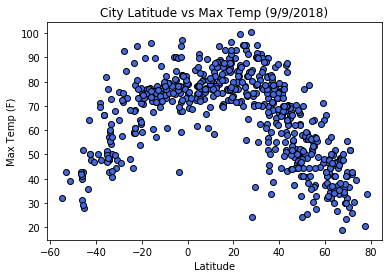

In [78]:
plt.scatter(cities.lat, cities.temp_max, marker='o', facecolors="royalblue", edgecolor="black")
plt.title("City Latitude vs Max Temp (9/9/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("City Latitude vs Max Temp.png")

#### Latitude vs. Humidity Plot

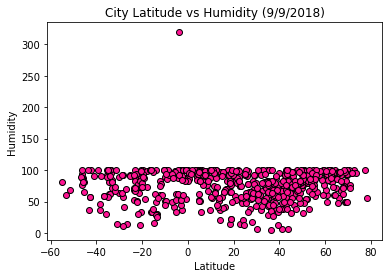

In [88]:
plt.scatter(cities.lat, cities.humidity, marker='o', facecolors="deeppink", edgecolor="black")
plt.title("City Latitude vs Humidity (9/9/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("City Latitude vs Humidity.png")

In [93]:
## Find the outlier. Question the validity of this value. Probably should not be included in the final dataset.
cities_humidity = cities.loc[cities['humidity'] > 100]
cities_humidity 

Unnamed: 0     city country  cloudiness          date  humidity    lat  \
163         163  iquitos      PE        24.0  1.537549e+09     319.0  -3.75   

        lon temp_max wind_speed  
163  -73.25     42.8        4.7

#### Latitude vs. Cloudiness Plot

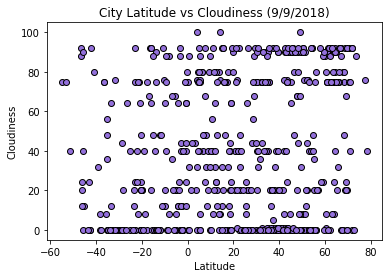

In [94]:
plt.scatter(cities.lat, cities.cloudiness, marker='o', facecolors="mediumpurple", edgecolor="black")
plt.title("City Latitude vs Cloudiness (9/9/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("City Latitude vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

Text(0,0.5,'Wind Speed')

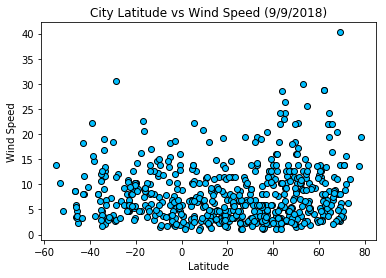

In [95]:
plt.scatter(cities.lat, cities.wind_speed, marker='o', facecolors="deepskyblue", edgecolor="black")
plt.title("City Latitude vs Wind Speed (9/9/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


In [96]:
plt.savefig("City Latitude vs Wind Speed.png")

<Figure size 432x288 with 0 Axes>

Three Observable Trends:
1. As expected, temperatures become significantly higher in cities closer to the equator.
2. There is no strong relationship between latitude and cloudiness.
3. There is no strong relationship between latitude and wind speed. 